In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import json
import matplotlib
import numpy as np
import pylab as plt

from common import FIGURE_PROPS as props
from data_validation import DataValidationPlots


#parent_directory = parent_directory = '/gpfs/bbp.cscs.ch/project/proj62/NGV/ARCHNGV/PROJECTS/endfeet_paper/circuits/00_test_bbpv1/'
#parent_directory = '/gpfs/bbp.cscs.ch/project/proj62/NGV/ARCHNGV/PROJECTS/endfeet_paper/circuits/placement_comparison/organized_placement_circuit_no_collision'

parent_directory = '/home/eleftherios/Projects/BBP/ASTRO_SYNTHESIS/Data/Circuits/exemplar_1'
#parent_directory =  '/gpfs/bbp.cscs.ch/project/proj62/NGV/ARCHNGV/PROJECTS/endfeet_paper/circuits/exemplars/exemplar_2'

figure_directory = './figures/data_validation'
#figure_directory = '/gpfs/bbp.cscs.ch/project/proj62/NGV/ARCHNGV/PROJECTS/endfeet_paper/notebooks/results_data_validation'

plots = DataValidationPlots(parent_directory + '/build/ngv_config.json', figure_directory)

with open('./data_validation.json') as fd:
    validation_data = json.load(fd)

/home/eleftherios/Projects/BBP/ARCHNGV/venv3.6/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


# Astrocyte somata validation

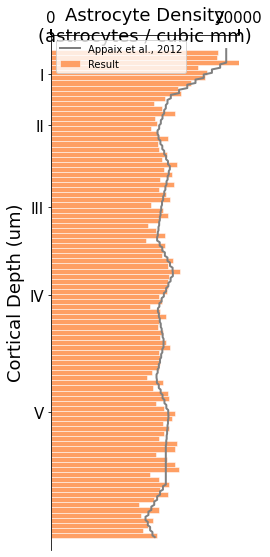

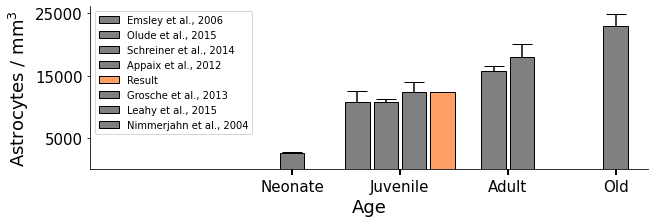

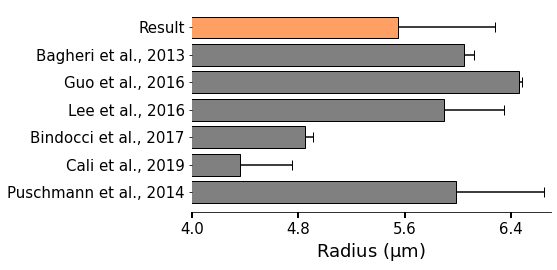

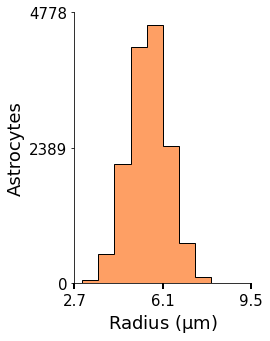

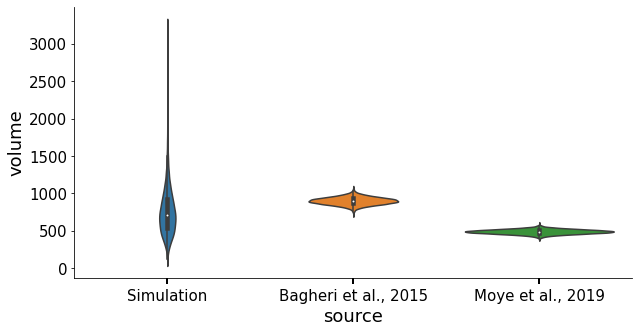

In [2]:

with matplotlib.rc_context(rc=props):


    f, ax = plt.subplots(1, 1, figsize=(4, 8))
    plots.somata.density_profile(ax, validation_data['input_density_profile'])
    plots.save_figure(f, ax, 'laminar_density')
    
    f, ax = plt.subplots(1, 1, figsize=(10, 3))
    plots.somata.density_comparison(ax, validation_data['soma_densities'])
    plots.save_figure(f, ax, 'total_density_comparison')

    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    plots.somata.radius_distribution_comparison(ax, validation_data['soma_radii'])
    plots.save_figure(f, ax, 'somata_radius_comparison')
    
    f, ax = plt.subplots(1, 1, figsize=(4, 5))
    plots.somata.radius_distribution_histogram(ax)
    plots.save_figure(f, ax, 'somata_radius_distribution')

    f, ax = plt.subplots(figsize=(10, 5))
    plots.somata.volume_distribution(ax, validation_data['soma_volumes'])
    plots.save_figure(f, ax, 'soma_volume_distribution')



# Astrocyte nearest neighbor

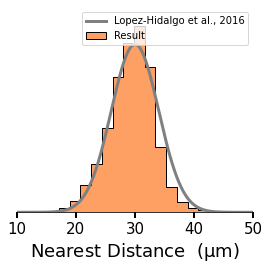

In [3]:

with matplotlib.rc_context(rc=props):

    f, ax = plt.subplots(1, 1, figsize=(4, 4))
    plots.somata.astrocyte_nearest_neighbor_distribution(ax, validation_data['astrocyte_nearest_neighbor_distribution'])
    plots.save_figure(f, ax, 'nearest_neighbor_distances')

    

# Microdomain volume distribution

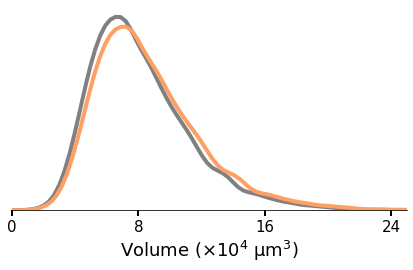

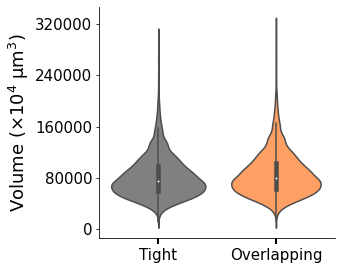

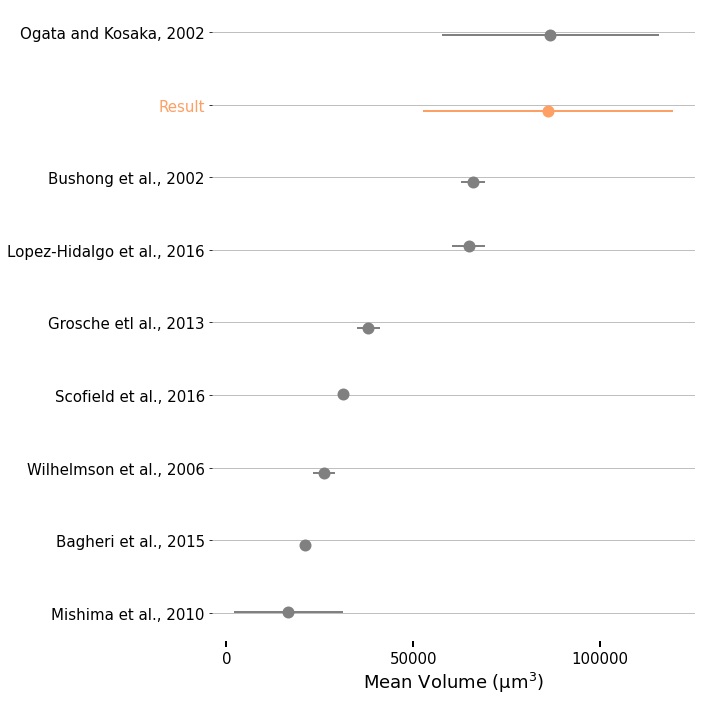

In [4]:

with matplotlib.rc_context(rc=props):
    
    f, ax = plt.subplots(1, 1)
    plots.microdomains.volume_distribution(ax)
    plots.save_figure(f, ax, 'microdomain_volume_distribution')
    
    f, ax = plt.subplots(1, 1, figsize=(5, 4))
    plots.microdomains.volume_distribution_violin(ax)
    plots.save_figure(f, ax, 'microdomain_volume_violins')
    
    f, ax = plt.subplots(figsize=(10, 10))
    plots.microdomains.volume_comparison(ax, validation_data['microdomain_volumes'])
    plots.save_figure(f, ax, 'microdomain_volume_comparison')


# Endfeet Areas & Path Lengths

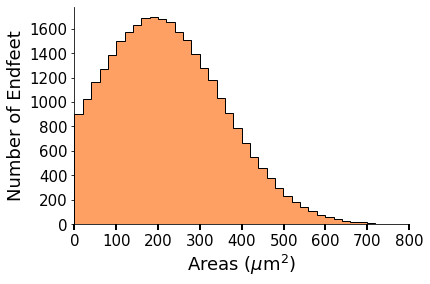

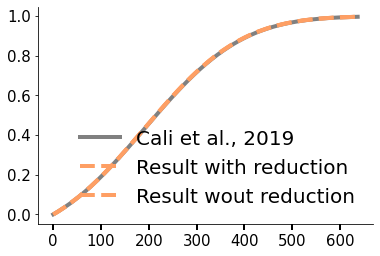

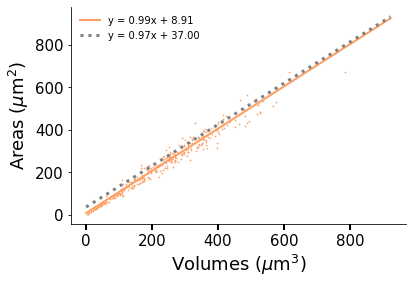

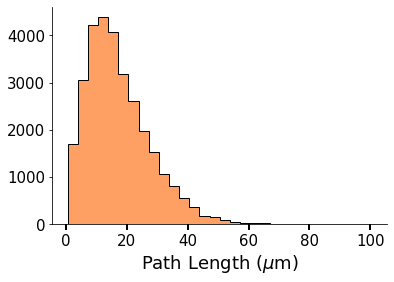

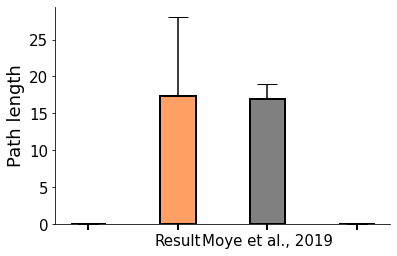

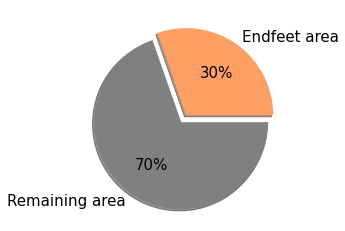

In [3]:
with matplotlib.rc_context(rc=props):
    
    f, ax = plt.subplots(1, 1)
    plots.endfeet.areas_histogram(ax, validation_data['endfeet_areas'])
    plots.save_figure(f, ax, 'endfeet_areas_histogram')
    
    f, ax = plt.subplots(1, 1)
    plots.endfeet.areas_cumulative_validation(ax, validation_data['endfeet_areas'])
    plots.save_figure(f, ax, 'endfeet_cumulative_comparison')
    
    f, ax = plt.subplots(1, 1)
    plots.endfeet.volume_area_scatter(ax, validation_data['endfeet_volume_area_ratio'])
    plots.save_figure(f, ax, 'endfeet_volume_area_ratios')
    
    f, ax = plt.subplots(1, 1)
    plots.endfeet.path_lengths_histogram(ax, validation_data['endfeet_path_lengths'])
    plots.save_figure(f, ax, 'endfeet_path_lengths_histogram')
    
    f, ax = plt.subplots(1, 1)
    plots.endfeet.path_lengths_bar_comparison(ax, validation_data['endfeet_path_lengths'])
    plots.save_figure(f, ax, 'endfeet_path_lengths_bar')
    
    f, ax = plt.subplots()
    plots.endfeet.area_coverage_pie(ax, None)
    plots.save_figure(f, ax, 'endfeet_vasculature_coverage_pie')



# Process stats per astrocyte

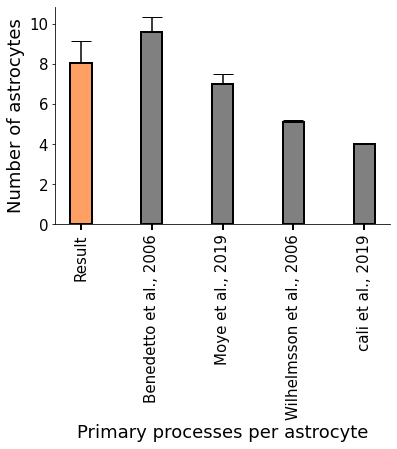

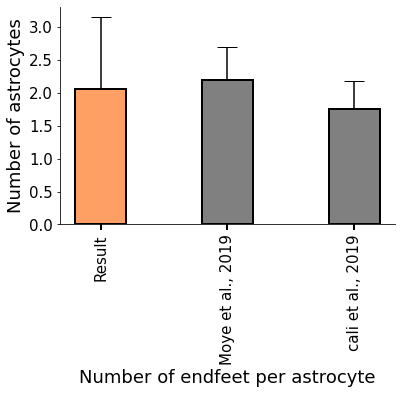

In [4]:
with matplotlib.rc_context(rc=props):


    f, ax = plt.subplots()
    plots.morphologies.primary_processes_per_astrocyte_bar(ax, validation_data['processes_primary'])
    plots.save_figure(f, ax, 'primary_processes_per_astrocyte')
    
    
    f, ax = plt.subplots()
    plots.morphologies.perivascular_processes_per_astrocyte_bar(ax, validation_data['processes_perivascular'])
    plots.save_figure(f, ax, 'perivascular_processes_per_astrocyte')

    

# Microdomain number of neighbors distribution

AttributeError: 'DataValidationPlots' object has no attribute 'circuit'

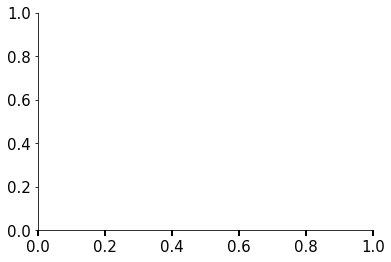

In [5]:
with matplotlib.rc_context(rc=props):

    f, ax = plt.subplots(1, 1)
    
    g = plots.circuit.connectome.glial
    
    neighbors_per_astrocyte = np.array([len(g.astrocyte_astrocytes(i)) for i in range(len(plots.circuit.data.astrocytes))])
    
    mask = neighbors_per_astrocyte > 0
    
    ax.hist(neighbors_per_astrocyte[mask], bins=5)
    